# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #5

# Due date: 3/10/2023

2. Same requirements from question '#1' but with a Lowpass filter and saves the output image as "lena_back_LP.jpg"

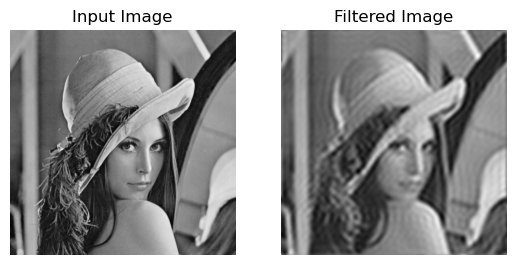

True

In [1]:
# Importing libreries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Reading lena image
img = cv2.imread('lena_gray.jpg',0)

# Converting image to float 32
img_float = np.float32(img)

# Discrete Fourier Transform
dft = cv2.dft(img_float, flags = cv2.DFT_COMPLEX_OUTPUT)

# Discrete Fourier Transform Shift
dft_shift = np.fft.fftshift(dft)

# Determining the centre of the image
rows, cols = img.shape
crow, ccol = rows//2 , cols//2

# Creating a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Applying the mask to Discrete Fourier Transform Shift
f_shift = dft_shift*mask

# Inverse Fourier Transform Shift
f_ishift = np.fft.ifftshift(f_shift)

# Inverse Fourier Transform
img_inv = cv2.idft(f_ishift)

# Determinig the magnitude of Inverse Fourier Transform
img_mag = cv2.magnitude(img_inv[:,:,0],img_inv[:,:,1])

# Normalizing the output image
img_output = cv2.normalize(img_mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# Showing the filtered image
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122),plt.imshow(img_output, 'gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

# Saving the output image
cv2.imwrite('lena_back_LP.jpg', img_output)